In [14]:
import numpy as np
import pandas as pd 
import scipy as sp
import scipy.io
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os
import glob
import fnmatch
import re
import argparse

import sys, getopt

In [15]:
def read_file(file_name_list):
    df_list =[]    
    _df = pd.DataFrame()

    for f in file_name_list[501:1000]:
        print(f)
        df_tmp = pd.read_csv(f, sep='\t', header=None) 
        #display(df_tmp.head())
        
        df_list.append(df_tmp)

    return pd.concat(df_list, axis=0)

In [17]:
#base_path = '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/calib'
base_path = '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data'

file_path = os.path.join(base_path,'C2*.dat')

file_name_list =  glob.glob(file_path) 
print(file_name_list)

['/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00000.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00001.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00002.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00003.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00004.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00005.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00006.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00007.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00008.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00009.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00010.dat', '/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-

In [18]:
print('reading ' , len(file_name_list), 'files') 
df_wf_ch2 = read_file(file_name_list)
df_wf_ch2.head()

reading  5029 files
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00501.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00502.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00503.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00504.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00505.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00506.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00507.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00508.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00509.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00510.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00511.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/dat

/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00600.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00601.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00602.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00603.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00604.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00605.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00606.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00607.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00608.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00609.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00610.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00611.dat
/eos

/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00699.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00700.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00701.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00733.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00734.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00735.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00736.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00737.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00738.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00739.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00740.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00741.dat
/eos

/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00829.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00830.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00831.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00832.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00833.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00834.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00835.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00836.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00837.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00838.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00839.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00840.dat
/eos

/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00928.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00929.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00930.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00931.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00932.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00933.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00934.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00935.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00936.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00937.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00938.dat
/eos/user/s/sbordoni/SiPM_XArapucafiles/calibration-04march-ch2/data/C2wf00939.dat
/eos

,0,1,2,3,4,5,6,7,8,9,...,49995,49996,49997,49998,49999,50000,50001,50002,50003,50004
0,e,/pro,2020/3/4 14:35:59.6940000000000,4352,4096,4096,3840,3840,4352,4608,...,5120,4352,4864,5120,4096,4608,4864,4352,4608,4864
0,e,/pro,2020/3/4 14:35:59.7160000000000,5120,4608,5120,5376,4608,4608,4864,...,4096,3840,4096,3840,3584,4352,4096,4352,4608,4608
0,e,/pro,2020/3/4 14:35:59.7610000000000,4608,4352,4608,4608,4096,4864,4608,...,6144,5632,5632,5376,5120,5376,5376,5120,5632,5376
0,e,/pro,2020/3/4 14:35:59.7960000000000,4608,4864,4608,4864,4864,4608,4608,...,5120,5120,4608,4608,4352,4352,4608,4352,4352,4352
0,e,/pro,2020/3/4 14:35:59.8410000000000,4608,4352,5120,5120,5120,5376,4864,...,4352,4864,5120,4864,4608,4608,4352,4352,4096,4352


In [19]:
ped   = list(range(10, 2000))   # to estimate the pedestal
rowin = list(range(3, 50004))   # all readout window
wf    = list(range(4000, 3000))  # waveform 
tail  = list(range(40500, 50000)) # to estimate the single p.e.

def defineRoI():
    
    print('Defined Region of Interest: ' )
    print('Pedestal region (ped)  : [', min(ped)  , ',' , max(ped)  , ']'  ) 
    print('Readout window (rowin) : [', min(rowin), ',' , max(rowin), ']'  ) 
    print('Waveform (wf)          : [', min(wf)   , ',' , max(wf)   , ']'  ) 
    print('Waveform tail (tail)   : [', min(tail) , ',' , max(tail) , ']'  ) 

    return ped, rowin, wf, pe

In [20]:
def do_reindex(df):
    df = df.copy()
    df.reset_index(inplace=True, drop=True)
    return df


def convert_time(df):
    df = df.copy()
    df[2] =  pd.to_datetime(df[2], format='%Y/%m/%d %H:%M:%S.%f')
    return df

#
# Flag the saturated waveform
###
def flag_saturated(df, val=10000):
    df=df.copy()
    df['Saturated']=(df[rowin].max(axis=1) >= val)
    return df


def compute_pedestal(df):
    df=df.copy()
    df['Pedestal']=df[ped].sum(axis=1)/len(ped)
    return df

def subtract_pedestal(df):
    df = df.copy()
    df[rowin] = df[rowin].subtract(df['Pedestal'], axis=0)
    return df

def remove_noise(df):
    df=df.copy()
    df[rowin]= df[rowin].rolling(window=250,  axis=1).mean()
    return df


def has_signal_new(df):
    df = df.copy()
    
    df_sig = df.apply(lambda x: find_signal(x, wf), axis=1)    
    df = pd.concat([df, df_sig], axis =1)

    return df


def find_signal(x, myrange):
    
    x = x[min(myrange) : max(myrange)]

    peaks, properties = find_peaks(x, height=[15,2000], width=10)
    peaks = peaks+min(myrange)
    
    npeaks = len(peaks)  
    if (npeaks > 0):
        height = properties['peak_heights'][0]
        width  = properties['widths'][0]
        xlow   = int(properties['left_ips'][0])
        xhigh  = int(properties['right_ips'][0])
        area   = x[xlow :xhigh].sum() 
    else :
        height = 0
        width  = 0
        area   = 0

    return pd.Series([(npeaks>0), height, area], index=['hasSignal', 'signal height', 'signal area'])


def find_singlePE(x, myrange):

    x = x[min(myrange) : max(myrange)]
    
    #peaks, properties = find_peaks(x, height=[10,30], width=30, distance = 50)    
    #peaks, properties = find_peaks(x, height=[5,20], prominence=[5,15], width=20, distance = 30)
    #peaks, properties = find_peaks(x, height=[400,1200], width=100, distance=1000, prominence=[600,1400])
    #peaks, properties = find_peaks(x, height=[600,800], width=60, distance=1000, prominence=[600,1000])
    peaks, properties = find_peaks(x, height=[2000,8000], width=600, distance=4000)
    peaks = peaks+min(myrange)
    
    npeaks = len(peaks)  
    if (npeaks > 0):
        height = properties['peak_heights'][0]
        width  = properties['widths'][0]
        xlow   = int(properties['left_ips'][0])
        xhigh  = int(properties['right_ips'][0])
        area   = x[xlow :xhigh].sum() 
    else :
        height = 0
        width  = 0
        area   = 0
        
    return pd.Series([npeaks, height, width, area], index=['n pe', 'pe height', 'pe width', 'pe area'])




def compute_singlepe(df):
    df = df.copy()

    df_pe = df.apply(lambda x: find_singlePE(x, rowin), axis=1)    
    df = pd.concat([df, df_pe], axis =1)
    
    return df


def select_singlepe(df):
    df = df.copy()

    X_pe=df.loc[(df['Saturated'] == False ) & 
                #(df['hasSignal'] == True ) &
                (df['pe height']>0)&
                (df['pe width']>0),['pe height', 'pe width']].values

    mu_pe, cov_pe = estimate_gaus_param(X_pe,True)

    df['spe 1sig'] = df.apply(lambda x: select_wf(x[['pe height','pe width']], mu_pe, cov_pe, 1), axis=1)
    df['spe 2sig'] = df.apply(lambda x: select_wf(x[['pe height','pe width']], mu_pe, cov_pe, 2), axis=1)

    return df


def estimate_gaus_param(X, multivar=False):
    mean = np.mean(X, axis=0)
    
    if multivar:
        cov = 1/float(len(X)) * np.dot( (X - mean).T , X-mean)
    else:
        cov = np.diag(np.var(X, axis=0))
    return mean,cov


def select_wf(xy, mean, cov, n_sigma):
 
    Z = multivariate_normal.pdf( xy , mean=mean, cov=cov)
    #print(Z)
    
    sigma = np.sqrt(np.diag(cov))
    limit = n_sigma * sigma     
        
    thrsld = multivariate_normal.pdf( limit, mean=mean, cov=cov)
    #print(thrsld)
    
    return Z > thrsld

In [21]:
#
# Routine to prepare datasets: check for possible saturation and compute, subtract pedestal 
##
def prepare_dataset(_df):

    _df = _df.copy()        
    print('preparing dataframe for channel : ') 
    _df = do_reindex(_df)
    _df = convert_time(_df)
    #_df = define_channel(_df)
    #_df = do_reindex(_df)
    _df = flag_saturated(_df, 65536)
    _df = compute_pedestal(_df)
    _df = subtract_pedestal(_df)
    _df = remove_noise(_df) 
    #_df = has_signal_new(_df)
    _df = compute_singlepe(_df)
    _df = select_singlepe(_df)
    #_df = tagGoodwf(_df)        

    print('done!')

    return _df


In [22]:
df_wf_ch2_proc = prepare_dataset(df_wf_ch2)

preparing dataframe for channel : 
done!


In [163]:
def find_pe_2(df, iwf):
    
    #pe_range= tail
    #print(pe_range)
    #pe_range    = list(range(40500, 50000)) 
    pe_range = list(range(3, 50004))   # all readout window
    #rowin = list(range(200, 800))
    #rowin = list(range(200,1500))
    x = df.iloc[iwf][pe_range]
    
    plt.plot(x)
    #df.iloc[iwf][rowin].plot()
    #peaks, properties = find_peaks(x, prominence=[5,20], width=20)
    #properties["prominences"], properties["widths"]
    #peaks, properties = find_peaks(x, height=[10,1000], prominence=[100,1200], width=8000, distance = 5000)
    peaks, properties = find_peaks(x, height=[2000,8000], width=600, distance=4000)
    #peaks, properties = find_peaks(x, height=[600,800], width=60, distance=1000, prominence=[600,1000])
    
    properties["peak_heights"], properties["widths"]
    
    print(properties["peak_heights"])
    print(properties["widths"])
    
    #print('peak x position', x[peaks])
        
    
    peaks = peaks+min(pe_range)
    print('here' , peaks)
    #peaks
    plt.plot(peaks, x[peaks], "x")
  
    plt.vlines(x=peaks, ymin=x[peaks] - properties["peak_heights"],
               ymax = x[peaks], color = "C1")
    plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"]+min(pe_range),
               xmax=properties["right_ips"]+min(pe_range), color = "C1")
    plt.xlabel('time ticks')
    plt.ylabel('ADC counts')
    
    
    plt.show()
    
    
    return peaks, properties

[4986.1801809]
[1061.68333333]
here [7276]


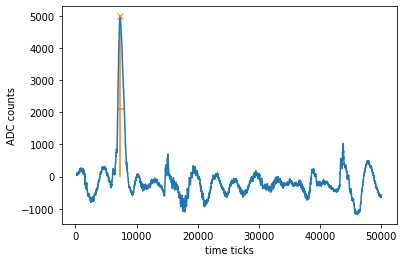

In [175]:
peaks, properties = find_pe_2(df_wf_ch2_proc, 6)

In [23]:
df_wf_ch2_proc.to_csv("calib_ch2_501-1000files.csv")

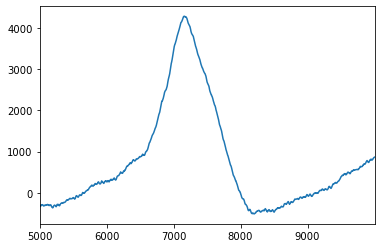

In [12]:
df_wf_ch2_proc.iloc[6][5000:10000].plot() 

In [157]:
df_wf_spe_ch2_calib = compute_singlepe(df_wf_ch2_proc)

In [158]:
df_wf_spe_ch2_calib.head()

,0,1,2,3,4,5,6,7,8,9,...,50001,50002,50003,50004,Saturated,Pedestal,n pe,pe height,pe width,pe area
0,e,/pro,2020-03-04 14:36:02.556828151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,176.477910,179.549910,180.573910,4864,False,4589.218090,0.0,0.000000,0.000000,0.000000e+00
1,e,/pro,2020-03-04 14:36:01.712691815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.756060,24.684060,20.588060,4352,False,4816.787940,0.0,0.000000,0.000000,0.000000e+00
2,e,/pro,2020-03-04 14:35:40.801107522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-315.057528,-315.057528,-314.033528,4608,False,5206.705528,2.0,2879.822472,909.766667,2.048734e+06
3,e,/pro,2020-03-04 14:35:40.664274488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.885025,-5.933025,-5.933025,5120,False,4873.005025,1.0,3192.018975,1078.292308,2.331124e+06
4,e,/pro,2020-03-04 14:35:41.916287523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.683940,159.635940,160.659940,5376,False,4911.212060,0.0,0.000000,0.000000,0.000000e+00


In [159]:
tmp =df_wf_spe_ch2_calib.loc[(df_wf_spe_ch2_calib['n pe']>0)]
tmp.shape

(184, 50011)

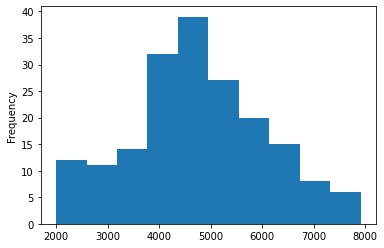

In [160]:
df_wf_spe_ch2_calib.loc[(df_wf_spe_ch2_calib['n pe']>0)]['pe height'].plot(kind='hist')

In [156]:
def find_singlePE(x, myrange):

    x = x[min(myrange) : max(myrange)]
    
    #peaks, properties = find_peaks(x, height=[10,30], width=30, distance = 50)    
    #peaks, properties = find_peaks(x, height=[5,20], prominence=[5,15], width=20, distance = 30)
    #peaks, properties = find_peaks(x, height=[400,1200], width=100, distance=1000, prominence=[600,1400])
    #peaks, properties = find_peaks(x, height=[600,800], width=60, distance=1000, prominence=[600,1000])
    peaks, properties = find_peaks(x, height=[2000,8000], width=600, distance=4000)
    peaks = peaks+min(myrange)
    
    npeaks = len(peaks)  
    if (npeaks > 0):
        height = properties['peak_heights'][0]
        width  = properties['widths'][0]
        xlow   = int(properties['left_ips'][0])
        xhigh  = int(properties['right_ips'][0])
        area   = x[xlow :xhigh].sum() 
    else :
        height = 0
        width  = 0
        area   = 0
        
    return pd.Series([npeaks, height, width, area], index=['n pe', 'pe height', 'pe width', 'pe area'])




def compute_singlepe(df):
    df = df.copy()

    df_pe = df.apply(lambda x: find_singlePE(x, rowin), axis=1)    
    df = pd.concat([df, df_pe], axis =1)
    
    return df